<a href="https://colab.research.google.com/github/Stefano0210/IULM_DDM2324_Notebooks/blob/main/14_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installiamo il dataset di DentMax**

In [ ]:
import pandas as pd

!wget "https://github.com/Stefano0210/IULM_DDM2324_Notebooks/raw/main/data/Capitolo5e6-DentMax.xlsx"
# Reading the dataset
data = pd.read_excel("Capitolo5e6-DentMax.xlsx")
data.head()


--2024-04-09 14:04:01--  https://github.com/Stefano0210/IULM_DDM2324_Notebooks/raw/main/data/Capitolo5e6-DentMax.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Stefano0210/IULM_DDM2324_Notebooks/main/data/Capitolo5e6-DentMax.xlsx [following]
--2024-04-09 14:04:01--  https://raw.githubusercontent.com/Stefano0210/IULM_DDM2324_Notebooks/main/data/Capitolo5e6-DentMax.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198329 (194K) [application/octet-stream]
Saving to: ‘Capitolo5e6-DentMax.xlsx’

Capitolo5e6-DentMax 100%[===================>] 193.68K  --.-KB/s    in 0.006s  

2024-04-09 14:04

,Observations / Segmentation Variables,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Integration,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers
0,Respondent 1,12,22,150,32,21,3,4,1,5,5,5,6,7,5,5,4,5,6
1,Respondent 2,13,22,150,32,20,3,4,1,5,5,5,7,7,5,5,4,5,5
2,Respondent 3,12,21,150,32,22,3,4,1,5,5,5,6,7,5,5,4,6,6
3,Respondent 4,11,21,150,33,21,3,4,1,5,5,5,6,7,4,5,4,5,5
4,Respondent 5,12,21,150,32,21,3,4,1,5,5,5,7,7,5,4,4,5,6


Il dataset contiene diverse colonne che rappresentano le variabili raccolte da DentMax durante l'evento DENTEXPO-2020. La prima colonna identifica i partecipanti, mentre le restanti colonne rappresentano le informazioni raccolte.

Procediamo con l'analisi PCA:

- standardizziamo i dati poiché PCA è sensibile alle varianze delle variabili
- calcoliamo PCA
- mostriamo la varianza spiegata da ogni componente principale, così come gli autovalori

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Dropping the first column which is just the respondent identifier
data_processed = data.drop(columns=["Observations / Segmentation Variables"])

# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_processed)

# Performing PCA
pca = PCA()
pca_data = pca.fit_transform(data_standardized)

# explained_variance_ratio_ si somma a 100% su tutti i componenti!
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

explained_variance, eigenvalues


(array([5.68233888e-01, 2.00378327e-01, 1.26271722e-01, 3.08977440e-02,
        2.43039737e-02, 1.33170151e-02, 1.10719275e-02, 8.46443901e-03,
        4.70657212e-03, 4.44647083e-03, 3.42933328e-03, 1.84653190e-03,
        1.11151158e-03, 9.00311450e-04, 2.89380931e-04, 2.47784362e-04,
        5.56019960e-05, 2.74647508e-05]),
 array([1.02326590e+01, 3.60837875e+00, 2.27387964e+00, 5.56401305e-01,
        4.37661815e-01, 2.39810537e-01, 1.99381382e-01, 1.52426174e-01,
        8.47551482e-02, 8.00712886e-02, 6.17548490e-02, 3.32520317e-02,
        2.00159110e-02, 1.62126551e-02, 5.21112246e-03, 4.46205855e-03,
        1.00127126e-03, 4.94580549e-04]))

Gli autovalori rappresentano la varianza spiegata da ogni componente principale. La varianza spiegata esprime la proporzione della varianza totale del dataset che viene catturata da ciascun componente.

- Il primo componente principale spiega il 56.82 della varianza totale e ha un autovalore di 10.23
- Il secondo componente principale spiega il  20.04% della varianza totale e ha un autovalore di 3.61
- Il terzo componente principale spiega il 12.63% della varianza totale e ha un autovalore di 2.27
-  etc per gli altri componenti.

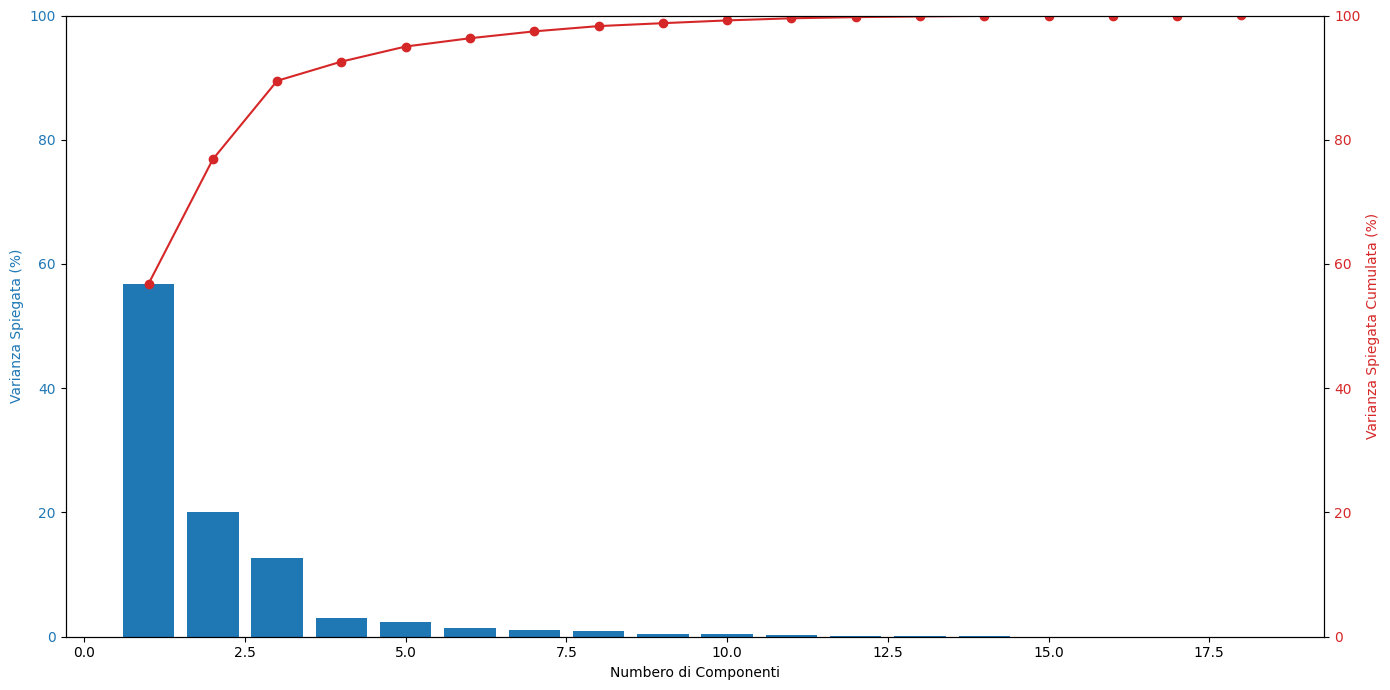

In [ ]:
import matplotlib.pyplot as plt

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Numbero di Componenti')
ax1.set_ylabel('Varianza Spiegata (%)', color=color)
ax1.bar(range(1, len(explained_variance) + 1), explained_variance*100, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 100])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Varianza Spiegata Cumulata (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance*100, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 100])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Il grafico mostra sia la varianza spiegata da ogni componente principale (in blu) sia la varianza cumulativa spiegata (in rosso).

Si può osservare che:

- Le prime tre componenti principali spiegano una grande parte della varianza del dataset, con la prima componente da sola che spiega più del 50% della varianza.
- Dopo le prime tre componenti, l'incremento nella varianza spiegata da ogni componente successivo diminuisce notevolmente.
- Sommando le prime tre componenti, otteniamo una varianza cumulativa spiegata di quasi il 90%.

Ora, per avere una comprensione più approfondita dei fattori, analizzerò i coefficienti di carico per ciascun componente principale. Questi coefficienti di carico ci diranno come ogni variabile contribuisce a ogni componente principale, permettendoci di interpretare il significato di ciascun componente.

In [ ]:
# Getting the PCA components (loadings)
loadings = pca.components_

# Converting loadings into a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=data_processed.columns,
                           index=[f"Component {i}" for i in range(1, loadings.shape[0] + 1)])

# Displaying loadings of the first three components
loadings_df.iloc[:3, :].T

,Component 1,Component 2,Component 3
Time Spent at DentMax Booth,0.296718,0.064759,0.184036
Time Spent at DentMed/OxyMax Booth,0.222492,-0.325270,0.199156
Total Time spent at show,0.222457,-0.259931,-0.304980
% Buying from DentMax in the past,0.267833,0.262807,-0.038921
Historical Sales Index,0.296614,-0.071063,0.179803
Sales Frequency,0.297629,0.117629,-0.076204
Length of Relationship,0.089076,-0.009448,0.610260
Number of Referrals Offered,0.213917,0.366691,0.105545
Importance of Image Quality,0.303430,0.075169,-0.008914
Importance of Diagnostic Flexibility,0.270277,0.207314,-0.078378


Ecco i coefficienti di carico per le prime tre componenti principali:

**Componente 1**

Ha carichi positivi elevati per "Time Spent at DentMax Booth", "Historical Sales Index", "Sales Frequency", "Importance of Image Quality" e "Trust in Dental Magazine Ads", tra gli altri. Questo componente sembra rappresentare una combinazione di tempo trascorso, acquisti storici e l'importanza data alla qualità dell'immagine e alla pubblicità su riviste dentali.


**Componente 2**

Ha carichi positivi per "Number of Referrals Offered", "Trust in TV ads", e "% Buying from DentMax in the past". D'altra parte, ha carichi negativi per "Time Spent at DentMed/OxyMax Booth", "Trust in Internet Ads", e "Importance of Software Integration". Questo componente sembra catturare una combinazione di fiducia nelle pubblicità TV e riferimenti offerti, ma una minore fiducia nelle pubblicità su internet e meno tempo trascorso in altri stand.

**Componente 3**

Ha un carico positivo molto elevato per "Length of Relationship" e "Importance of Technical Assistance". Mentre ha carichi negativi elevati per "Trust in TV ads" e "Total Time spent at show". Questo componente sembra catturare una combinazione di durata della relazione e l'importanza dell'assistenza tecnica, ma una minore fiducia nelle pubblicità TV e meno tempo totale trascorso nella fiera.

Queste interpretazioni sono basate sui coefficienti di carico e ci danno una visione di ciò che ogni componente rappresenta in termini delle variabili originali. Tuttavia, è importante notare che queste interpretazioni sono soggettive e possono variare a seconda del contesto e della conoscenza del dominio.

## Grafico 3D

Per concludere l'esercizio, visualizziamo il grafico 3D. Resta al lettore effettuare un clustering, invece che su tutte le variabili, solo sui componenti principali

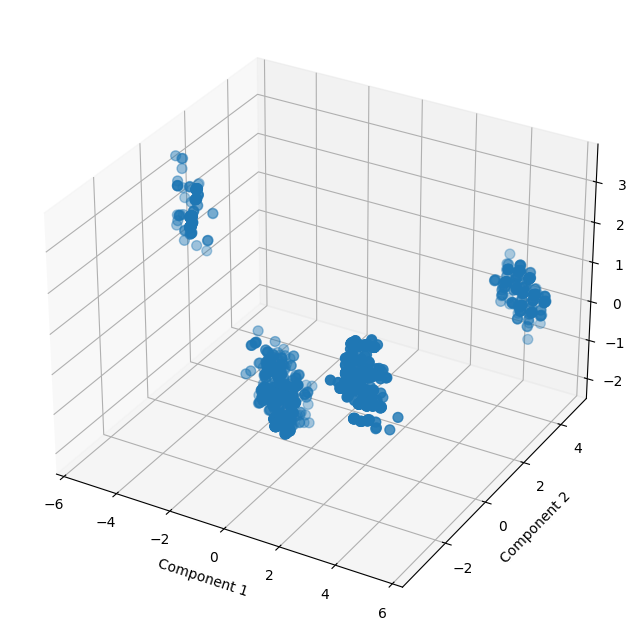

In [ ]:
# Extracting the scores of the first three principal components
scores_pca = pca_data[:, 0:3]

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scores_pca[:, 0], scores_pca[:, 1], scores_pca[:, 2], s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()